## Monitoring: OBS Data and DWD Temperature
based on open data ressources only

created by Simon Metzler at Radprofessur Wildau 

* project page https://innohub13.de/wir-forschen/zu-nah/ 
* page of Radprofessur https://www.th-wildau.de/radverkehr

---

---
<a id="import">import python packages<a> 

In [1]:
import geopandas as gpd
import pandas as pd

In [1]:
#print(gpd.__version__)

In [5]:
import glob
from tqdm import tqdm
import matplotlib.pyplot as plt

In [6]:
#from matplotlib_scalebar.scalebar import ScaleBar
import contextily as ctx

In [8]:
import seaborn as sns
import matplotlib.ticker as ticker


---
<a id="parse">parse data<a> 

In [9]:
# manual downlaod from export-tab (automatic download is possible yet not encouraged)
#https://obs.adfc-brandenburg.de/
#https://obs.adfc-bw.de/
#https://obs.radentscheid-essen.de/
#https://portal.openbikesensor.org/
#https://obs.adfc-darmstadt.de/

# Stand 1.2.23

files = glob.glob(r'portale\*.geojson')

len(files)

11

In [10]:
gdf =gpd.GeoDataFrame()

for f in tqdm(files):
    gdf_this = gpd.read_file(f, crs='EPSG:4326')
    portal_name=f.split('_')[-1].replace('.geojson','')
    datum_stand=f.split('_')[0].replace('portale\\','')
    
    gdf_this['portal']= portal_name

    gdf=gdf.append(gdf_this)
    
    print ("portal_name: " + portal_name)
    print ("Anzahl Datenpunkte: " + str(len(gdf_this)))
    print ("Stand vom: " + datum_stand)
    
                                        
print ("\nAnzahl Datenpunkte gesamt: "+ str(len(gdf)))

  0%|          | 0/11 [00:00<?, ?it/s]C:\Users\simon\AppData\Local\Temp\ipykernel_20180\1726496946.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf=gdf.append(gdf_this)


portal_name: adfc-ac
Anzahl Datenpunkte: 138
Stand vom: 230201


C:\Users\simon\AppData\Local\Temp\ipykernel_20180\1726496946.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf=gdf.append(gdf_this)
 18%|█▊        | 2/11 [00:02<00:10,  1.11s/it]

portal_name: adfc-brandenburg
Anzahl Datenpunkte: 16410
Stand vom: 230201


C:\Users\simon\AppData\Local\Temp\ipykernel_20180\1726496946.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf=gdf.append(gdf_this)
 27%|██▋       | 3/11 [00:05<00:15,  2.00s/it]

portal_name: adfc-bw
Anzahl Datenpunkte: 25504
Stand vom: 230201


C:\Users\simon\AppData\Local\Temp\ipykernel_20180\1726496946.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf=gdf.append(gdf_this)
 36%|███▋      | 4/11 [00:08<00:16,  2.31s/it]

portal_name: adfc-darmstadt
Anzahl Datenpunkte: 21547
Stand vom: 230201


C:\Users\simon\AppData\Local\Temp\ipykernel_20180\1726496946.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf=gdf.append(gdf_this)
 45%|████▌     | 5/11 [00:09<00:10,  1.79s/it]

portal_name: adfc-luebeck
Anzahl Datenpunkte: 5580
Stand vom: 230201


C:\Users\simon\AppData\Local\Temp\ipykernel_20180\1726496946.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf=gdf.append(gdf_this)
 55%|█████▍    | 6/11 [00:10<00:07,  1.56s/it]

portal_name: adfc-osnabrueck
Anzahl Datenpunkte: 7874
Stand vom: 230201


C:\Users\simon\AppData\Local\Temp\ipykernel_20180\1726496946.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf=gdf.append(gdf_this)
 64%|██████▎   | 7/11 [00:11<00:05,  1.34s/it]

portal_name: obs-portal-koeln
Anzahl Datenpunkte: 6398
Stand vom: 230201


C:\Users\simon\AppData\Local\Temp\ipykernel_20180\1726496946.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf=gdf.append(gdf_this)
 73%|███████▎  | 8/11 [00:11<00:03,  1.11s/it]

portal_name: portal-1meter50-at
Anzahl Datenpunkte: 4460
Stand vom: 230201


C:\Users\simon\AppData\Local\Temp\ipykernel_20180\1726496946.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf=gdf.append(gdf_this)
 82%|████████▏ | 9/11 [00:17<00:05,  2.60s/it]

portal_name: portal-openbikesensor
Anzahl Datenpunkte: 45780
Stand vom: 230201


C:\Users\simon\AppData\Local\Temp\ipykernel_20180\1726496946.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf=gdf.append(gdf_this)
 91%|█████████ | 10/11 [00:19<00:02,  2.38s/it]

portal_name: radentscheid-essen
Anzahl Datenpunkte: 14294
Stand vom: 230201


C:\Users\simon\AppData\Local\Temp\ipykernel_20180\1726496946.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf=gdf.append(gdf_this)
100%|██████████| 11/11 [00:21<00:00,  1.97s/it]

portal_name: portal-openbikesensor-hamburg
Anzahl Datenpunkte: 15508
Stand vom: 230206

Anzahl Datenpunkte gesamt: 163493


In [11]:
# Duplikate löschen, falls User Daten auf mehrere Portale geladen haben
gdf=gdf.drop_duplicates(subset=['distance_overtaker','time','geometry']).copy()
gdf

,distance_overtaker,distance_stationary,direction,way_id,course,speed,time,geometry,portal
0,1.74,NaN,1,38376065.0,4.203713,4.416667,2022-07-12 16:43:09+00:00,POINT (6.03870 50.78771),adfc-ac
1,1.57,NaN,1,38376065.0,4.210995,4.444444,2022-07-12 16:43:12+00:00,POINT (6.03861 50.78760),adfc-ac
2,1.72,1.80,1,NaN,4.876590,3.055556,2022-07-12 17:12:09+00:00,POINT (5.96262 50.79092),adfc-ac
3,NaN,1.11,1,NaN,4.901329,3.750000,2022-07-12 17:12:28+00:00,POINT (5.96278 50.79019),adfc-ac
4,2.14,NaN,1,NaN,4.879833,3.611111,2022-07-12 17:12:30+00:00,POINT (5.96280 50.79013),adfc-ac
...,...,...,...,...,...,...,...,...,...
15503,1.36,NaN,-1,4918816.0,1.875186,6.694444,2023-02-05 08:32:42+00:00,POINT (10.09987 53.58697),portal-openbikesensor-hamburg
15504,2.69,NaN,-1,595938623.0,1.758828,5.361111,2023-02-05 08:32:48+00:00,POINT (10.09970 53.58730),portal-openbikesensor-hamburg
15505,1.23,NaN,1,602001144.0,0.640275,4.861111,2023-02-05 08:38:01+00:00,POINT (10.09852 53.59676),portal-openbikesensor-hamburg
15506,1.89,NaN,1,152294749.0,4.832616,6.388889,2023-02-05 15:05:11+00:00,POINT (10.09824 53.59272),portal-openbikesensor-hamburg


---
<a id="geo">Geo overview<a> 

<AxesSubplot:>

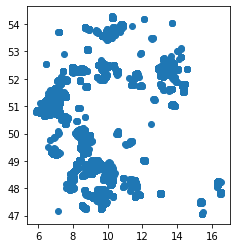

In [10]:
gdf.plot()

<Axes: >

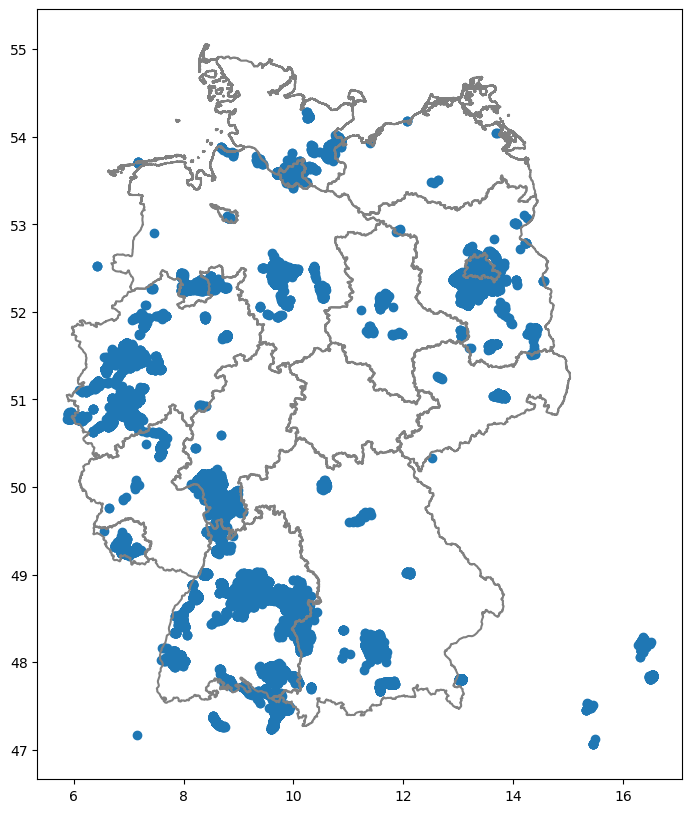

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax)

bland = gpd.read_file("https://raw.githubusercontent.com/isellsoap/deutschlandGeoJSON/main/2_bundeslaender/1_sehr_hoch.geo.json")
bland.boundary.plot(ax=ax, color='gray')

---
<a id="pre">pre processing<a> 


In [13]:
# from m in cm
gdf['distance_overtaker']=gdf['distance_overtaker']*100
gdf['distance_stationary']=gdf['distance_stationary']*100

In [15]:
# remove all datapoints with meassuerements below 15cm to clean wrong messurements due to ultrasonic sensor issues
gdf=gdf[~(gdf.distance_overtaker<15)&~(gdf.distance_stationary<15)].copy()

In [16]:
gdf

,distance_overtaker,distance_stationary,direction,way_id,course,speed,time,geometry,portal,distance_overtaker_binned,distance_overtaker_binned_25
0,174.0,NaN,1,38376065.0,4.203713,4.416667,2022-07-12 16:43:09+00:00,POINT (6.03870 50.78771),adfc-ac,150-200,150-175
1,157.0,NaN,1,38376065.0,4.210995,4.444444,2022-07-12 16:43:12+00:00,POINT (6.03861 50.78760),adfc-ac,150-200,150-175
2,172.0,180.0,1,NaN,4.876590,3.055556,2022-07-12 17:12:09+00:00,POINT (5.96262 50.79092),adfc-ac,150-200,150-175
3,NaN,111.0,1,NaN,4.901329,3.750000,2022-07-12 17:12:28+00:00,POINT (5.96278 50.79019),adfc-ac,NaN,NaN
4,214.0,NaN,1,NaN,4.879833,3.611111,2022-07-12 17:12:30+00:00,POINT (5.96280 50.79013),adfc-ac,200-250,200-225
...,...,...,...,...,...,...,...,...,...,...,...
15503,136.0,NaN,-1,4918816.0,1.875186,6.694444,2023-02-05 08:32:42+00:00,POINT (10.09987 53.58697),portal-openbikesensor-hamburg,100-150,125-150
15504,269.0,NaN,-1,595938623.0,1.758828,5.361111,2023-02-05 08:32:48+00:00,POINT (10.09970 53.58730),portal-openbikesensor-hamburg,>250,>250
15505,123.0,NaN,1,602001144.0,0.640275,4.861111,2023-02-05 08:38:01+00:00,POINT (10.09852 53.59676),portal-openbikesensor-hamburg,100-150,100-125
15506,189.0,NaN,1,152294749.0,4.832616,6.388889,2023-02-05 15:05:11+00:00,POINT (10.09824 53.59272),portal-openbikesensor-hamburg,150-200,175-200


-----

### get voronoi shape with dwd weather station ids

In [145]:
gdf_vn_wetter=gpd.read_file('../gdf_vn_wetter.geojson', driver='GeoJSON')
gdf_vn_wetter_points=gpd.read_file('../gdf_vn_wetter_points.geojson', driver='GeoJSON')

#gpd.read_file("../gdf_vn_wetter.gpkg", layer='poly', driver="GPKG")
gdf_vn_wetter.head()

,Stationsname,Stations_ID,Bundesland,Beginn,Ende,geometry
0,Rheinfelden,4175,BW,01.09.1953,22.03.2023,"POLYGON ((7.83775 47.75371, 7.90848 47.70179, ..."
1,Perl-Nennig,3904,SL,01.01.1981,22.03.2023,"POLYGON ((6.59671 49.51498, 6.59841 49.47398, ..."
2,Müllheim,259,BW,01.05.1978,31.07.1993,"POLYGON ((7.55011 48.08234, 7.82186 47.83799, ..."
3,Berus,460,SL,01.01.1981,22.03.2023,"POLYGON ((6.59841 49.47398, 6.82247 49.37688, ..."
4,Emmendingen-Mundingen,1224,BW,01.11.1975,22.03.2023,"POLYGON ((7.95232 48.25508, 7.98475 48.11407, ..."


(5.391295377050632, 15.518434997057504, 46.85852601479078, 55.467859525495676)

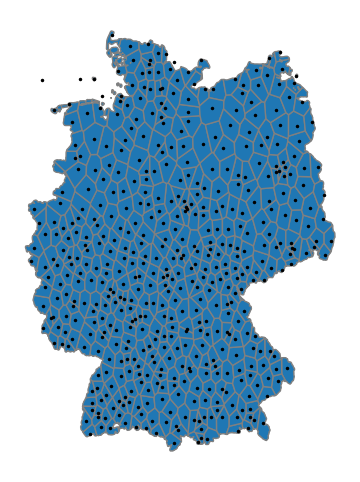

In [147]:

ax=gdf_vn_wetter.plot(figsize=(6,6),linewidth=1, edgecolor='gray')

gdf_vn_wetter_points.plot(ax=ax, color='k', markersize=1)
ax.axis('off')

In [28]:
gdf_stationID=gdf.sjoin(gdf_vn_wetter[['geometry','Stations_ID']])

In [29]:
gdf_stationID

,distance_overtaker,distance_stationary,direction,way_id,course,speed,time,geometry,portal,distance_overtaker_binned,distance_overtaker_binned_25,index_right,Stations_ID
0,174.0,NaN,1,38376065.0,4.203713,4.416667,2022-07-12 16:43:09+00:00,POINT (6.03870 50.78771),adfc-ac,150-200,150-175,53,15000
1,157.0,NaN,1,38376065.0,4.210995,4.444444,2022-07-12 16:43:12+00:00,POINT (6.03861 50.78760),adfc-ac,150-200,150-175,53,15000
39,120.0,NaN,1,113519500.0,0.443064,4.055556,2022-07-12 20:00:45+00:00,POINT (6.06714 50.79910),adfc-ac,100-150,100-125,53,15000
40,269.0,222.0,1,413032222.0,5.965547,3.944444,2022-07-12 20:15:10+00:00,POINT (6.11464 50.80057),adfc-ac,>250,>250,53,15000
41,109.0,NaN,-1,212022956.0,0.146619,8.277778,2022-07-12 07:23:18+00:00,POINT (6.14892 50.80555),adfc-ac,100-150,100-125,53,15000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12284,182.0,NaN,1,NaN,4.275634,3.805556,2022-11-10 06:49:44+00:00,POINT (7.15999 53.70096),radentscheid-essen,150-200,175-200,337,3631
12285,95.0,NaN,1,NaN,1.224636,7.500000,2022-11-10 06:59:40+00:00,POINT (7.16047 53.70142),radentscheid-essen,50-100,75-100,337,3631
12286,120.0,NaN,1,NaN,1.175706,6.444444,2022-11-10 06:59:49+00:00,POINT (7.16083 53.70195),radentscheid-essen,100-150,100-125,337,3631
12287,129.0,NaN,1,NaN,2.529432,3.583333,2022-11-06 13:31:38+00:00,POINT (7.16188 53.69914),radentscheid-essen,100-150,125-150,337,3631


In [37]:
gdf_stationID['time_byHour']=gdf_stationID.time.round('H')

In [31]:
import glob
temp_hist_url=r"../../wetter/dwd_akt/stundenwerte_TU_*"

files = glob.glob(temp_hist_url)
files=[x for x in files if not x.endswith('.zip') ]
len(files)

504

In [32]:
# takes ~2min

temp_hist_data_all=pd.DataFrame()

for f in files:
    txt_file = glob.glob(f+"/produkt_tu*")
    temp_hist_data= pd.read_csv(txt_file[0], sep=';')
    
    #temp_hist_data_all=temp_hist_data_all.concat(temp_hist_data)

    temp_hist_data_all=pd.concat([temp_hist_data_all, temp_hist_data])

In [33]:
temp_hist_data=temp_hist_data_all.copy()

In [127]:
# takes ~1min
temp_hist_data['date'] = pd.to_datetime(temp_hist_data['MESS_DATUM'], format='%Y%m%d%H', utc=False)#.dt.tz_localize('Europe/Berlin')

temp_hist_data = temp_hist_data[temp_hist_data['TT_TU']!=-999.].copy()

In [133]:
temp_hist_data['date']=temp_hist_data['date'].dt.tz_localize("Europe/Berlin", ambiguous='NaT', nonexistent='NaT')

In [134]:
temp_hist_data

,STATIONS_ID,MESS_DATUM,QN_9,TT_TU,RF_TU,eor,date
0,44,2021092000,3,11.8,88.0,eor,2021-09-20 00:00:00+02:00
1,44,2021092001,3,11.7,88.0,eor,2021-09-20 01:00:00+02:00
2,44,2021092002,3,11.5,89.0,eor,2021-09-20 02:00:00+02:00
3,44,2021092003,3,11.4,88.0,eor,2021-09-20 03:00:00+02:00
4,44,2021092004,3,11.2,90.0,eor,2021-09-20 04:00:00+02:00
...,...,...,...,...,...,...,...
13195,19172,2023032319,1,10.2,74.0,eor,2023-03-23 19:00:00+01:00
13196,19172,2023032320,1,10.4,77.0,eor,2023-03-23 20:00:00+01:00
13197,19172,2023032321,1,10.0,80.0,eor,2023-03-23 21:00:00+01:00
13198,19172,2023032322,1,10.0,83.0,eor,2023-03-23 22:00:00+01:00


In [135]:
temp_hist_data

,STATIONS_ID,MESS_DATUM,QN_9,TT_TU,RF_TU,eor,date
0,44,2021092000,3,11.8,88.0,eor,2021-09-20 00:00:00+02:00
1,44,2021092001,3,11.7,88.0,eor,2021-09-20 01:00:00+02:00
2,44,2021092002,3,11.5,89.0,eor,2021-09-20 02:00:00+02:00
3,44,2021092003,3,11.4,88.0,eor,2021-09-20 03:00:00+02:00
4,44,2021092004,3,11.2,90.0,eor,2021-09-20 04:00:00+02:00
...,...,...,...,...,...,...,...
13195,19172,2023032319,1,10.2,74.0,eor,2023-03-23 19:00:00+01:00
13196,19172,2023032320,1,10.4,77.0,eor,2023-03-23 20:00:00+01:00
13197,19172,2023032321,1,10.0,80.0,eor,2023-03-23 21:00:00+01:00
13198,19172,2023032322,1,10.0,83.0,eor,2023-03-23 22:00:00+01:00


In [136]:
### mehr by time and Stations_id

In [137]:
gdf_OBStemp=gdf_stationID.merge(temp_hist_data, left_on=['Stations_ID','time_byHour'], right_on=['STATIONS_ID','date'])

In [138]:
gdf_OBStemp['temp_round']=gdf_OBStemp['TT_TU'].round(0)

In [139]:
gdf_OBStemp

,distance_overtaker,distance_stationary,direction,way_id,course,speed,time,geometry,portal,distance_overtaker_binned,...,Stations_ID,time_byHour,STATIONS_ID,MESS_DATUM,QN_9,TT_TU,RF_TU,eor,date,temp_round
0,174.0,NaN,1,38376065.0,4.203713,4.416667,2022-07-12 16:43:09+00:00,POINT (6.03870 50.78771),adfc-ac,150-200,...,15000,2022-07-12 17:00:00+00:00,15000,2022071219,3,24.7,49.0,eor,2022-07-12 19:00:00+02:00,25.0
1,157.0,NaN,1,38376065.0,4.210995,4.444444,2022-07-12 16:43:12+00:00,POINT (6.03861 50.78760),adfc-ac,150-200,...,15000,2022-07-12 17:00:00+00:00,15000,2022071219,3,24.7,49.0,eor,2022-07-12 19:00:00+02:00,25.0
2,120.0,NaN,1,113519500.0,0.443064,4.055556,2022-07-12 20:00:45+00:00,POINT (6.06714 50.79910),adfc-ac,100-150,...,15000,2022-07-12 20:00:00+00:00,15000,2022071222,3,20.7,64.0,eor,2022-07-12 22:00:00+02:00,21.0
3,269.0,222.0,1,413032222.0,5.965547,3.944444,2022-07-12 20:15:10+00:00,POINT (6.11464 50.80057),adfc-ac,>250,...,15000,2022-07-12 20:00:00+00:00,15000,2022071222,3,20.7,64.0,eor,2022-07-12 22:00:00+02:00,21.0
4,109.0,NaN,-1,212022956.0,0.146619,8.277778,2022-07-12 07:23:18+00:00,POINT (6.14892 50.80555),adfc-ac,100-150,...,15000,2022-07-12 07:00:00+00:00,15000,2022071209,3,22.5,53.0,eor,2022-07-12 09:00:00+02:00,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128921,182.0,NaN,1,NaN,4.275634,3.805556,2022-11-10 06:49:44+00:00,POINT (7.15999 53.70096),radentscheid-essen,150-200,...,3631,2022-11-10 07:00:00+00:00,3631,2022111008,3,10.6,92.0,eor,2022-11-10 08:00:00+01:00,11.0
128922,95.0,NaN,1,NaN,1.224636,7.500000,2022-11-10 06:59:40+00:00,POINT (7.16047 53.70142),radentscheid-essen,50-100,...,3631,2022-11-10 07:00:00+00:00,3631,2022111008,3,10.6,92.0,eor,2022-11-10 08:00:00+01:00,11.0
128923,120.0,NaN,1,NaN,1.175706,6.444444,2022-11-10 06:59:49+00:00,POINT (7.16083 53.70195),radentscheid-essen,100-150,...,3631,2022-11-10 07:00:00+00:00,3631,2022111008,3,10.6,92.0,eor,2022-11-10 08:00:00+01:00,11.0
128924,129.0,NaN,1,NaN,2.529432,3.583333,2022-11-06 13:31:38+00:00,POINT (7.16188 53.69914),radentscheid-essen,100-150,...,3631,2022-11-06 14:00:00+00:00,3631,2022110615,3,11.9,81.0,eor,2022-11-06 15:00:00+01:00,12.0


In [140]:
#gdf_OBStemp

In [141]:
#HELPER
##reorder column
#comparator function for sort
def mixs(num):
    try:
        ele = int(num)
        return (0, ele, '')
    except ValueError:
        return (1, num, '')

In [142]:
import pandas as pd

In [143]:
sns.set_context("talk")

Text(0.5, 1.09, 'OBS-Daten: ADFC Brandenburg, Radentscheid Essen, ADFC BW, OBS-Portal, ADFC Darmstadt, ADFC Osnabrück, \nADFC Aachen, OBS-Portal Köln, ADFC Lübeck, OBS-Portal 1meter50, OBS-Portal Hamburg \n(n=126878, Stand 01.02.23)')

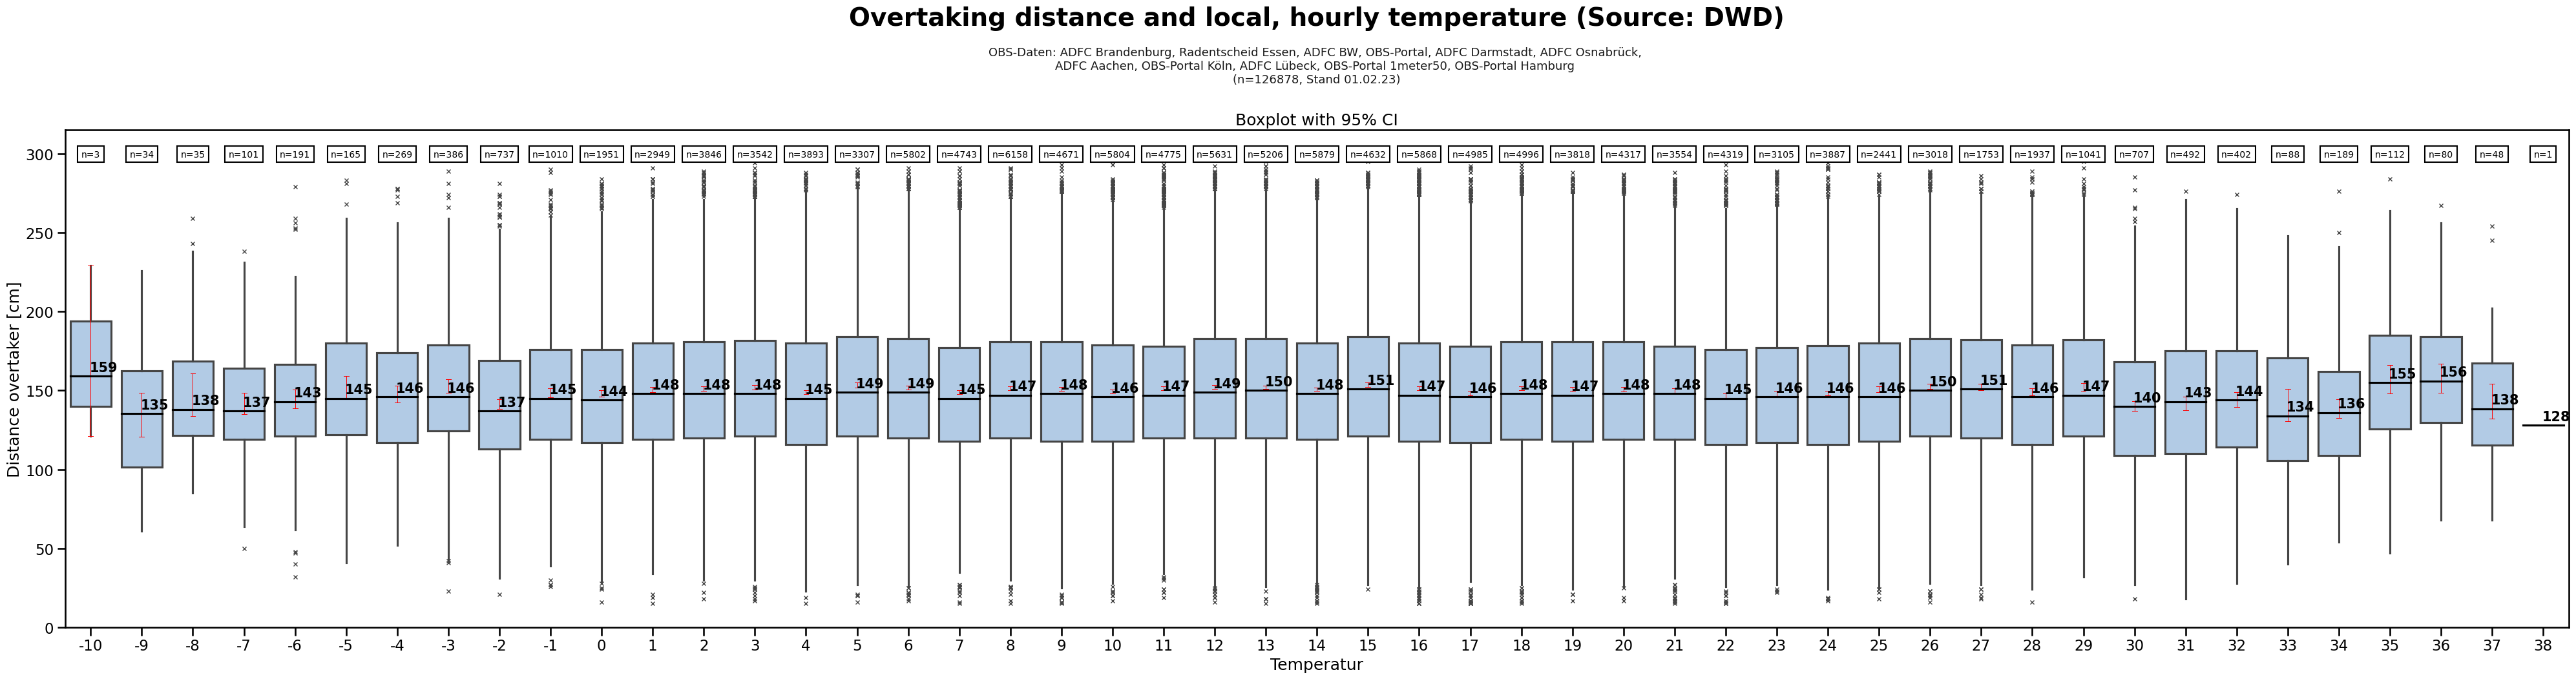

In [144]:

data_c_plot=gdf_OBStemp.copy()



for col in data_c_plot.dtypes.loc[lambda x: x == 'category'].index:
    data_c_plot[col] = data_c_plot[col].cat.remove_unused_categories()
    
x_ax='temp_round'
data_c_plot=data_c_plot[data_c_plot[x_ax]>-100]

data_c_plot[x_ax]=data_c_plot[x_ax].astype(int).astype(str)



x_ax_ordered_str=data_c_plot[x_ax].unique()
#x_ax_ordered_str.sort()
#x_ax_ordered_str.sort(mixs)
x_ax_ordered_str=sorted(x_ax_ordered_str, key=int)    


#data_c_plot[x_ax]=data_c_plot[x_ax].astype(int)
fig, ax =plt.subplots(
                      figsize=(50,10),
                     )

### add boxplot left
ax1= sns.boxplot(
    data=data_c_plot, x=x_ax, y="distance_overtaker",
    showcaps=False,
    flierprops={"marker": "x"},
    order = x_ax_ordered_str,
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "k"},
    ax=ax)

### add labels to ax1
# medians
medians = data_c_plot.groupby([x_ax])['distance_overtaker'].median()
medians=medians.reindex(x_ax_ordered_str)
vertical_offset = data_c_plot['distance_overtaker'].median() * 0.02 # offset from median for display

for xtick in ax1.get_xticks():
    ax1.text(xtick+0.25,medians[xtick] + vertical_offset, int(medians[xtick]), 
            horizontalalignment='center',
             size='small',
             color='k',
             weight='semibold')
    
# counts on top   
counts = data_c_plot.groupby([x_ax])['distance_overtaker'].count()#.astype(int)
counts=counts.reindex(x_ax_ordered_str)
#vertical_offset = 0.99 # offset from median for display

for xtick in ax1.get_xticks():
    ax1.text(xtick,298,"n=" +str(counts[xtick]), 
            horizontalalignment='center',
             size='10',
             #rotation=30,
             color='k',
             #weight='semibold',
            bbox=dict(facecolor='w'))


### add boxplot right
ax2= sns.barplot( 
    data=data_c_plot, x=x_ax, y="distance_overtaker",
    #palette="Blues", 
    order = x_ax_ordered_str,
    alpha=0.0,
    capsize=.1, n_boot=1000, errorbar=('ci', 95),
        errcolor= 'red', #errcolor='.26' =
    errwidth=0.7, 
    ax=ax)



#ax.set_xticklabels(ax1.get_xmajorticklabels(), rotation=30)
#ax.set_xticklabels(ax2.get_xmajorticklabels(), rotation=30)

ax1.set(title='Boxplot with 95% CI')
ax1.set_ylabel('Distance overtaker [cm]')
ax1.set_xlabel('Temperatur')

#add overall title
#ax.text(x=0.5, y=1.13, s='Overtaking distance local, hourly temperature', fontsize=22, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
#ax.text(x=0.5, y=1.08, s="OBS-Data: ADFC Brandenburg, Radentscheid Essen, ADFC BW, OBS-Portal, \n  ADFC Darmstadt, ADFC Osnabrück: (n=" + str(counts.sum())+', 2022-11-07)', fontsize=12, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

ax.text(x=0.5, y=1.20, s='Overtaking distance and local, hourly temperature (Source: DWD)', fontsize=28, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
#ax.text(x=0.5, y=1.10, s="OBS-Data: ADFC Brandenburg, Radentscheid Essen, ADFC BW, OBS-Portal, ADFC Darmstadt, ADFC Osnabrück  (n=" + str(counts.sum())+')', fontsize=13, alpha=0.9, ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.09, s="OBS-Daten: ADFC Brandenburg, Radentscheid Essen, ADFC BW, OBS-Portal, ADFC Darmstadt, ADFC Osnabrück, \nADFC Aachen, OBS-Portal Köln, ADFC Lübeck, OBS-Portal 1meter50, OBS-Portal Hamburg \n(n=" + str(counts.sum())+', Stand 01.02.23)', fontsize=13, alpha=0.9, ha='center', va='bottom', transform=ax.transAxes)


#ax.text(x=1, y=-0.20, s="* keine Unterscheidung nach Infrastrukturbreiten", fontsize=13, alpha=0.9, ha='right', va='bottom', transform=ax.transAxes)
#ax.text(x=1, y=-0.27, s="Erstellt von FG Radverkehr | TH Wildau", fontsize=15, alpha=0.9, ha='right', va='bottom', transform=ax.transAxes)


#fig.show()
#fig.savefig("OBS_analysis_osm_maxspeed_boxplot.png", dpi=300)